In [1]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial.distance as sd
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

# Clustering Jerárquico con SKLearn

En el siguiente link se encuentra la documentación oficial:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

## Ejemplo 1

El siguiente ejemplo fue obtenido del siguiente sitio:
https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

Set de datos

In [2]:
points = np.array([[5,3], [10,15], [15,12], [24,10], [30,30],[85,70], [71,80], [60,78], [70,55],[80,91],])
labels = range(1, 11)  

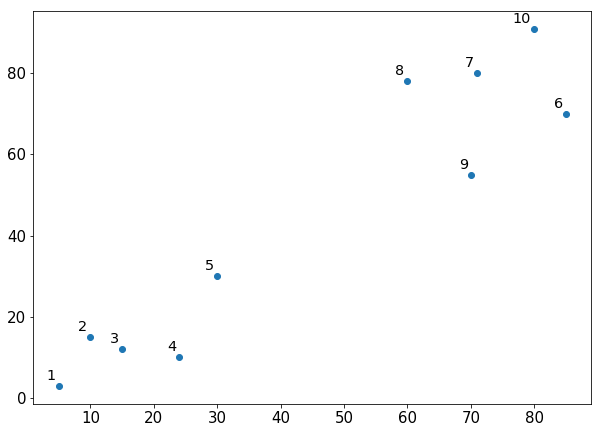

In [3]:
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(points[:,0],points[:,1], label='True Position')
plt.tick_params(axis='x', which='major', labelsize=15)
plt.tick_params(axis='y', which='major', labelsize=15)
for label, x, y in zip(labels, points[:, 0], points[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom', 
        fontsize = 'x-large')
plt.show()  

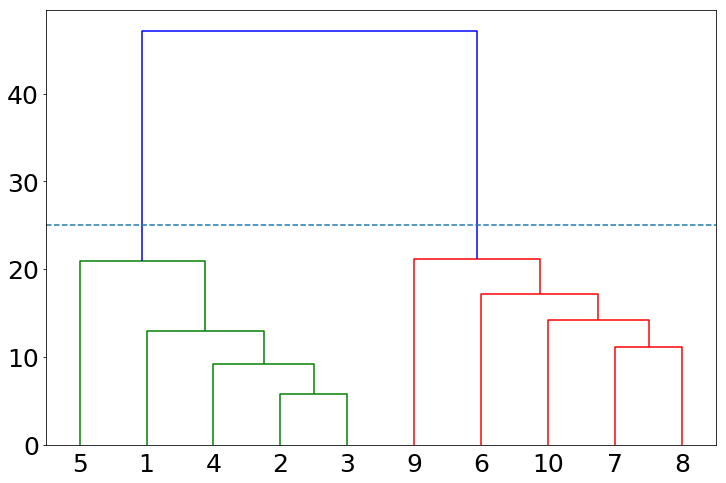

In [4]:
Z = hierarchy.linkage(points, 'single')

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
dn = hierarchy.dendrogram(Z, ax=axes, labels = labels)
axes.tick_params(axis='x', which='major', labelsize=25)
axes.tick_params(axis='y', which='major', labelsize=25)
axes.axhline(y=25, linestyle='dashed')
plt.show()

Con SKLearn, fácilmente se puede clusterizar los puntos definiendo la distancia a utilizar y la estrategia para calcular la distancia entre clusters

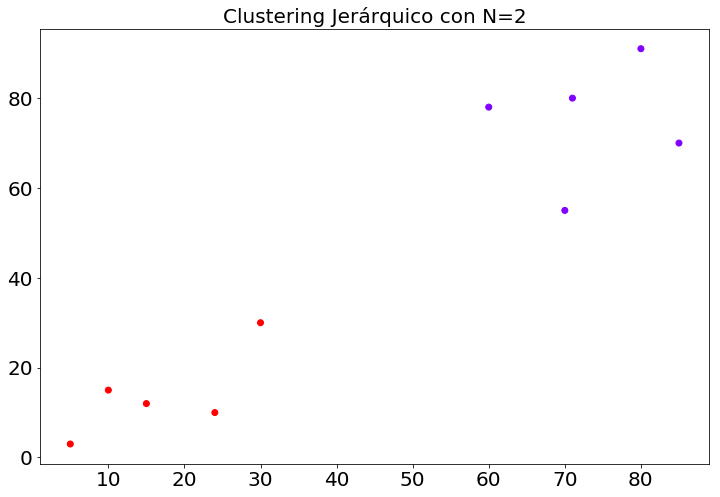

In [5]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(points) 

plt.figure(figsize=(12,8))
plt.scatter(points[:,0],points[:,1], c=cluster.labels_, cmap='rainbow')  
plt.title('Clustering Jerárquico con N=2', fontsize=20)
plt.tick_params(labelsize=20);


## Ejemplo 2

En este ejemplo utilizamos un set de datos generado por la biblioteca sklearn

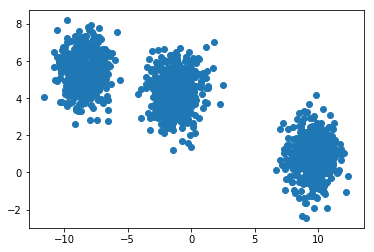

In [6]:
n_samples = 1500
blobs, labels = datasets.make_blobs(n_samples=n_samples, random_state=7, centers=3)
plt.scatter(blobs[:,0],blobs[:,1])

In [7]:
Z = hierarchy.linkage(blobs, 'single')

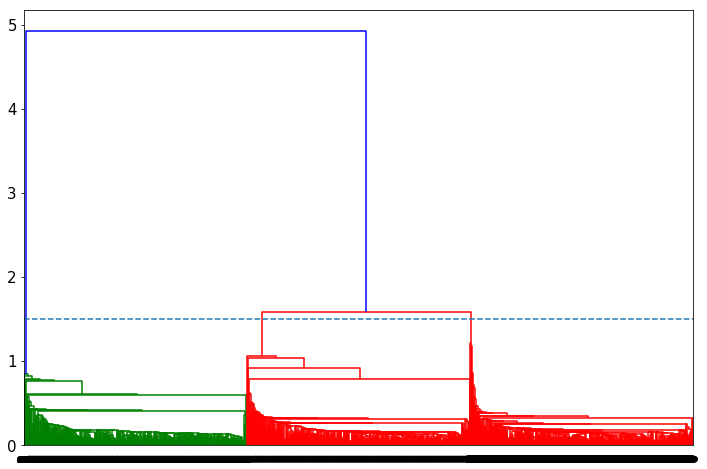

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
dn = hierarchy.dendrogram(Z, ax=axes, labels = labels)
axes.tick_params(axis='x', which='major', labelsize=15)
axes.tick_params(axis='y', which='major', labelsize=15)
axes.axhline(y=1.5, linestyle='dashed')
plt.show()

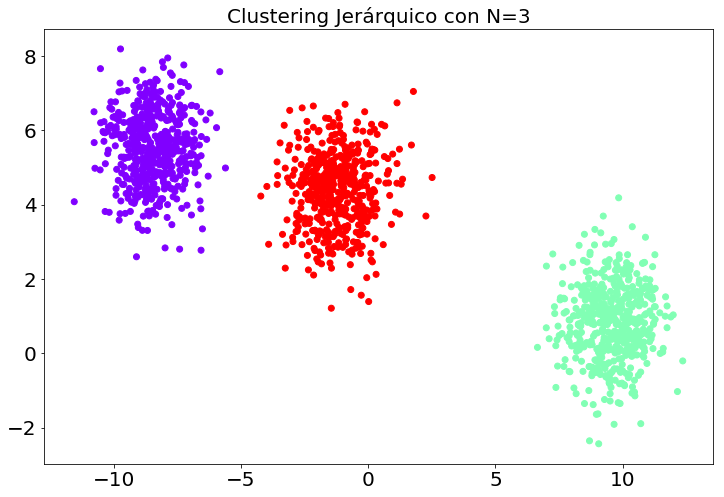

In [10]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
cluster.fit_predict(blobs) 

plt.figure(figsize=(12,8))
plt.scatter(blobs[:,0],blobs[:,1], c=cluster.labels_, cmap='rainbow')  
plt.title('Clustering Jerárquico con N=3', fontsize=20)
plt.tick_params(labelsize=20);
